In [106]:
import random
import math
import itertools
import numpy as np 
import matplotlib.pyplot as plt
from sympy import factorial
from decimal import Decimal

## ***Тема 3 “Последовательность”***

**1. Как связаны между собой понятия последовательности и множества?**

Обратимся к определениям этих понятий:

Последовательность — это пронумерованный набор каких-либо объектов, среди которых допускаются повторения, причём порядок объектов имеет значение.

Мно́жество — одно из ключевых понятий математики; представляющее собой набор, совокупность каких-либо (вообще говоря любых) объектов — элементов этого множество. Два множества равны тогда и только тогда, когда содержат в точности одинаковые элементы.

Иначе говоря, множество (англ. set) — это неупорядоченный набор (совокупность) каких-либо уникальных объектов, наделённых некоторыми общими признаками (характеристиками, чертами, свойствами).

На мой взгляд последовательность как бы вытекает из множества и является более продвинутой, если так можно выразиться, версией набора элементов на базе множества, в которой добавились новые свойства, такие как, упорядоченность элементов, возможность повторения элементов, возможность задания по формуле. То есть множество, это просто набор различных элементов, объединенных на базе общего принципа, а последовательность, это набор элементов, которые имеют порядок, и которые в некоторых случаях можно задавать по формуле, т.е. можно предсказывать последующие элементы и изучать поведение последовательности.

**2. Даны 4 последовательности. Необходимо:**

**исследовать их на монотонность;**

**исследовать на ограниченность;**

**найти пятый по счету член.**



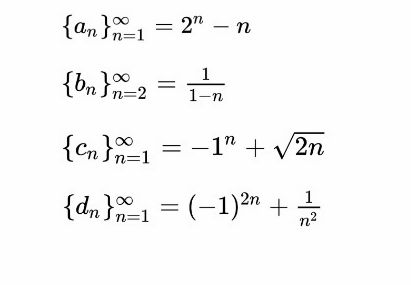

=== Последовательность 1 ===


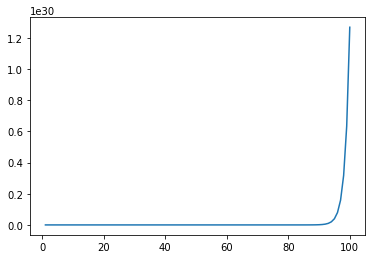

Последовательность монотонно возрастает
Последовательность ограничена первым ее членом 1.0
5й член = 27
=== Последовательность 2 ===


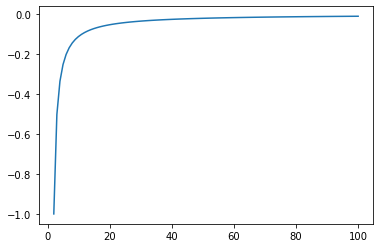

Последовательность монотонно возрастает
Последовательность ограничена первым ее членом -1.0
5й член = -0.25
=== Последовательность 3 ===


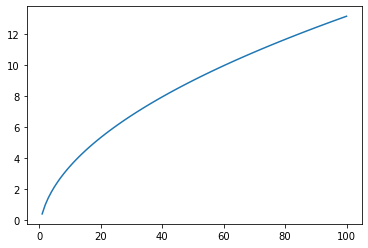

Последовательность монотонно возрастает
Последовательность ограничена первым ее членом 0.41421356237309515
5й член = 2.1622776601683795
=== Последовательность 4 ===


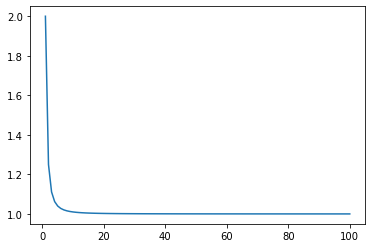

Последовательность монотонно убывает
Последовательность ограничена первым ее членом 2.0
5й член = 1.04


In [107]:
class SequenceResearcher:
    def __init__(self, seq_number, member_number):
        self.FUNC_DICT = {
            '1': [lambda x: 2**x - x, 1, float('inf')],
            '2': [lambda x: 1/(1-x), 2, float('inf')],
            '3': [lambda x: -1 ** x + math.sqrt(2 * x), 1, float('inf')],
            '4': [lambda x: (-1) ** (2 * x) + 1 / (x ** 2), 1, float('inf')]
            }
        self.seq_number = seq_number
        self.sequence = self.FUNC_DICT[self.seq_number] 
        self.member_number = member_number
        
    def _get_sequence(self):
        if self.sequence[2] == float('inf'):
            x = np.linspace(self.sequence[1], 100, 100)
            y = np.array(list(map(self.sequence[0], x)))
        return x, y
        
    def _get_plot(self):
        x, y = self._get_sequence() 
        plt.plot(x, y)
        plt.show()
            
    def _monotony(self):
        x, y = self._get_sequence() 
        for i in range(1, len(y)):
            if y[i] >= y[i-1]:
                return 'Последовательность монотонно возрастает'
            elif y[i] <= y[i-1]:
                return 'Последовательность монотонно убывает'
            else:
                return 'Последовательность не изменяется'
            
    def _limitation(self):
        x, y = self._get_sequence()
        return f'Последовательность ограничена первым ее членом {y[0]}'

    def _get__member(self):
        return self.sequence[0](self.member_number)
    
    def research(self):
        print(f'=== Последовательность {int(self.seq_number)} ===')
        self._get_plot()
        print(self._monotony())
        print(self._limitation())
        print(f'{self.member_number}й член = {self._get__member()}')
        

MEMBER_NUMBER = 5
a = SequenceResearcher('1', MEMBER_NUMBER)
b = SequenceResearcher('2', MEMBER_NUMBER)
c = SequenceResearcher('3', MEMBER_NUMBER)
d = SequenceResearcher('4', MEMBER_NUMBER)
SEQ_LIST  = [a, b, c, d]
for el in SEQ_LIST:
    el.research()    

**3. Найти 12-й член заданной неявно последовательности**


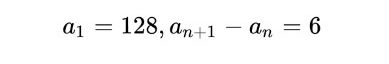

In [108]:
#Ответ: 194
#Тут несложно, но поясню на всякий случай. Из формулы получается, что у нас каждый член больше предыдущего на 6.
#1й член уже есть = 128.
#Получается, чтобы найти 12й член надо к 1му члену 11 раз прибавить 6.
a12 = 128 + 11 * 6
print(f'12-й член заданной неявно последовательности = {a12}')

12-й член заданной неявно последовательности = 194


***4. На языке Python предложить алгоритм вычисляющий численно предел с точностью $$\varepsilon = 10^-7$$**

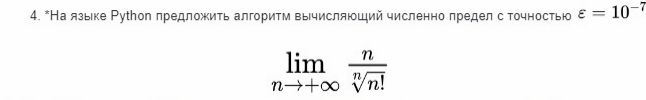

In [109]:
# n / (n! ** (1 / n))
# n = 1, +oo

def f(n):
    n = Decimal(n)
    return n / pow(factorial(n), 1 / n)

In [110]:
%%time
eps = Decimal(10 ** -7)
i = 1
n = 1
x0 = f(n)
while True:
    i += 1
    n += 1
    x1 = f(n)
    if abs(x0 - x1) <= eps:
        break
    x0 = x1
print(f'n_iter: {i}')
print(f'f(n) = {x0}')

n_iter: 11779
f(n) = 2.71698832372746
Wall time: 24.7 s


***5. Предложить оптимизацию алгоритма, полученного в задании 4, ускоряющую его сходимость**

In [111]:
%%time
eps = Decimal(10 ** -7)
i = 1
n = 1
x0 = f(n)
while True:
    i += 1
    n += random.randint(1, 100)
    x1 = f(n)
    if abs(x0 - x1) <= eps:
        break
    x0 = x1
print(f'n_iter: {i}')
print(f'f(n) = {x0}')

n_iter: 292
f(n) = 2.71719651868700
Wall time: 681 ms


In [112]:
%%time
eps = Decimal(10 ** -7)
i = 1
n = 1
result = 1
while result > eps:
    x0 = f(n)
    n += random.randint(1, 100)
    x1 = f(n)
    result = abs(x0 - x1)
    x0 = x1
    i+=1
    
print(f'n_iter: {i}')
print(f'f(n) = {x0}')

n_iter: 357
f(n) = 2.71741877326780
Wall time: 716 ms
